In [2]:
import numpy as np
from matplotlib import pyplot as plt
from google.colab import drive
import padasip as pa

# Лабораторная работа 3.5
В файле «CorruptedSignal.txt» записаны показания фотоплетизмографа, а в файле «Acceleration.txt» – показания акселерометра (для простоты предположим, что акселерометр – одноосевой). Используя алгоритм адаптивного шумоподавления, скорректированы показания фотоплетизмографа. Для проверки результатов фильтрации в файле «Signal.txt» записан неискаженный сигнал фотоплетизмографа.

In [4]:
corrupted = open('/CorruptedSignal.txt').read().split('\n')
acc = open('/Acceleration.txt').read().split('\n')

In [5]:
x_n = np.array([float(c) for c in corrupted[:-1]]) # удаляем одну пустую строку в конце файла
r_n = np.array([float(c) for c in acc[:-5]]) # у сигнала акселерометра на 4 отсчёта больше, чем у сигнала прибора

In [6]:
src = open('/Signal.txt').read().split('\n')
d_n = np.array([float(c) for c in src[:-1]])

In [7]:
N = len(x_n)

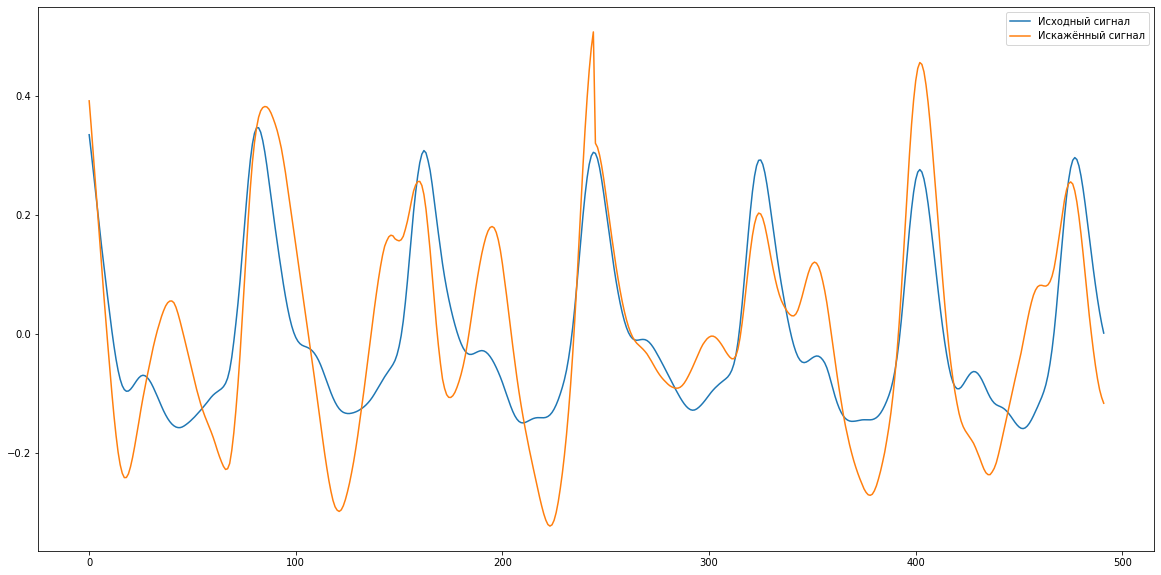

In [8]:
plt.figure(figsize=(20, 10))
plt.plot(range(N), d_n)
plt.plot(range(N), x_n)
plt.legend(['Исходный сигнал', 'Искажённый сигнал'])

In [9]:
Nf = 20

r_x = pa.input_from_history(r_n, Nf)[:-1]
x_n = x_n[Nf:] # отсечение первых отсчётов сигнала согласно примеру (Noise Cancellation)

lms = pa.filters.FilterLMS(Nf, mu=0.1)
y, e_n, w = lms.run(x_n, r_x)

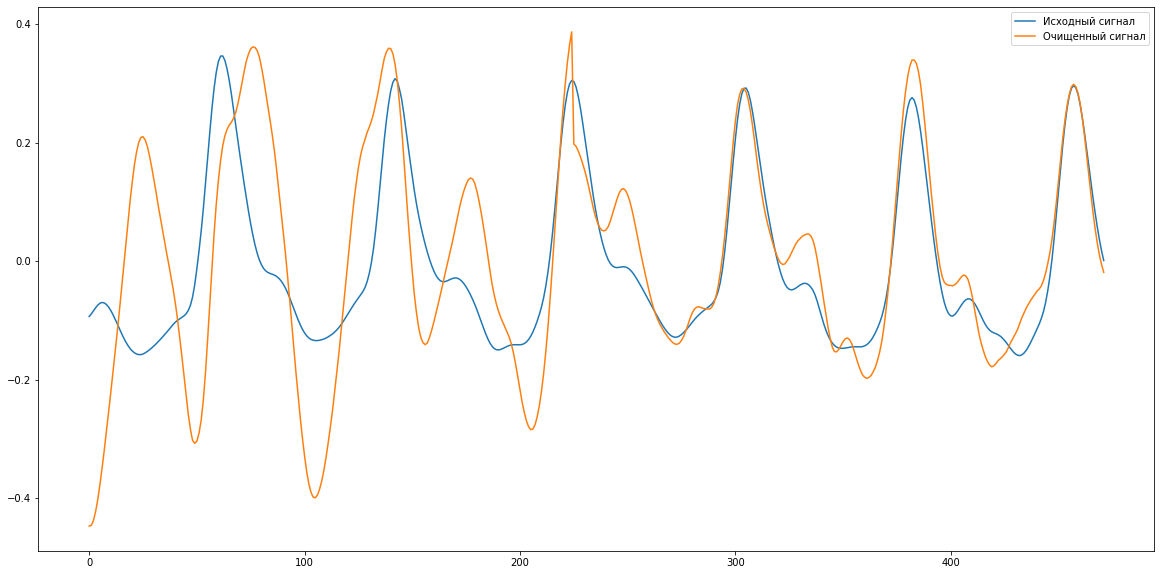

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(range(N - Nf), d_n[Nf:])
plt.plot(range(N - Nf), e_n)
plt.legend(['Исходный сигнал', 'Очищенный сигнал'])